In [2]:
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 12,7

In [3]:
students = pd.read_csv("StudentsPerformance.csv")
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
students = students[['math score', 'gender', 'test preparation course']]

In [5]:
def mark(row):
    if 0 < row['math score'] <= 20:
        return '20<'
    elif 20 < row['math score'] <= 40:
        return '20<40'
    elif 40 < row['math score'] <= 60:
        return '40<60'
    elif 60 < row['math score'] <= 80:
        return '60<80'
    elif 80 < row['math score'] < 101:
        return '80<100'
        

In [6]:
students['math score'] = students.apply(mark, axis=1)
students.head()

,math score,gender,test preparation course
0,60<80,female,none
1,60<80,female,completed
2,80<100,female,none
3,40<60,male,none
4,60<80,male,none


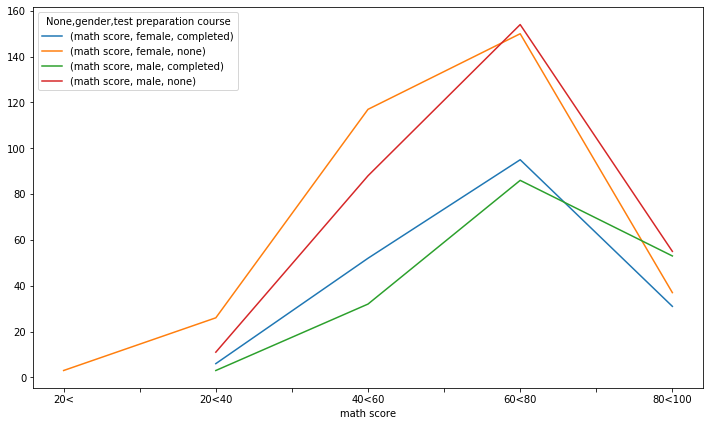

In [7]:
(students
 .groupby(['math score', 'gender', 'test preparation course'])
 .agg({'math score':'count'})
).unstack('gender').unstack('test preparation course').plot()

По данному графику можно сделать вывод, что во всех группах больше всего человек получили оценки от 60 до 80.

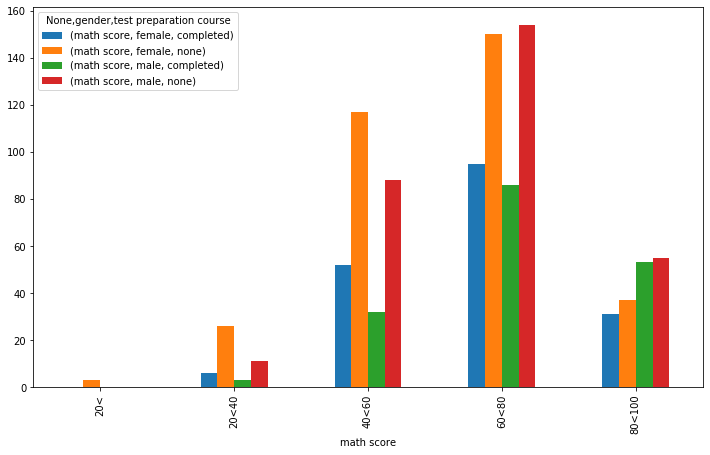

In [8]:
(students
 .groupby(['math score', 'gender', 'test preparation course'])
 .agg({'math score':'count'})
).unstack('gender').unstack('test preparation course').plot(kind='bar')

По данному графику можно заметить, что в группе оценок (от 60 до 80) больше девочек и мальчиков, которые не проходили курсы.

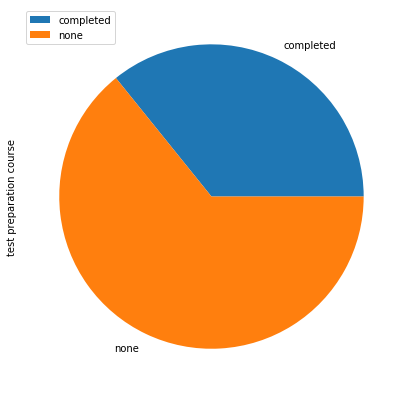

In [9]:
(students
 .groupby(['test preparation course'])
 .agg({'test preparation course':'count'})
).plot(kind='pie', y='test preparation course')

По данному графику можно сказать, что больше студентов, которые не проходили курсы.

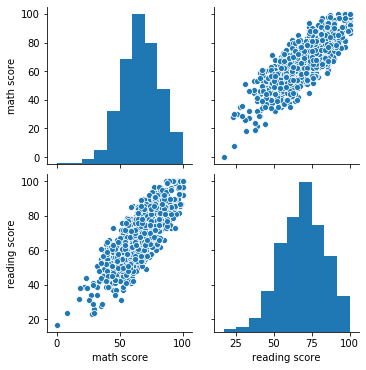

In [10]:
import seaborn as sns
students_2 = pd.read_csv("StudentsPerformance.csv")
sns_plot = sns.pairplot(
    students_2[['math score', 'reading score', 'gender']])
sns_plot

Один из выводов, если студент хорошо знает математику, то он хорошо знает и чтение, тк зависимость похожа на линейную


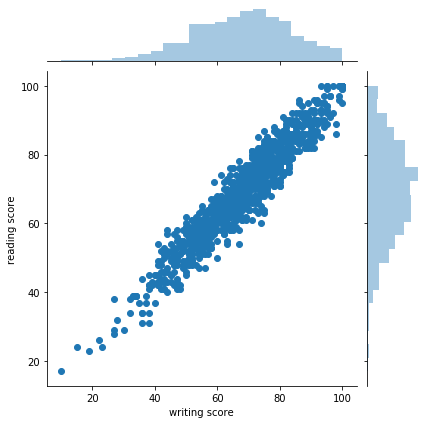

In [11]:
sns.jointplot(x='writing score', y='reading score', 
              data=students_2, kind='scatter')

Один из выводов, если студент отлично знает письмо, то он отлично знает и чтение, тк зависимость близка к линейной